In [1]:
%matplotlib inline

In [2]:
from nlp import load_dataset

In [92]:
import sys
sys.path.append('../')

In [93]:
import file_utils

In [12]:
from pathlib import Path, PurePath
print(Path.cwd())

/home/ubuntu/Fusion/visualizations


In [5]:
dataset_path = Path.cwd()/'../data/wikihow/'

In [7]:
dataset_path.resolve()

PosixPath('/home/ubuntu/Fusion/data/wikihow')

In [50]:
wikihow_all = 'https://public-nlp-datasets.s3.us-west-2.amazonaws.com/wikihowAll.csv'
wikihow_sep = 'https://public-nlp-datasets.s3.us-west-2.amazonaws.com/wikihowSep.csv'

In [ ]:
import file_utils

In [94]:
file_utils.preview_file(wikihow_all)

connection status = 200
File is available, size of wikihowAll.csv is 590.4891 MB 


In [95]:
wikihow_all_ds = "wikihowAll.csv"
wikihow_sep_ds = "wikihowSep.csv"

In [98]:
!mkdir data

In [100]:
from nlp import load_dataset
dataset = load_dataset('wikihow', 'all', data_dir='.')


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset wikihow downloaded and prepared to /home/ubuntu/.cache/huggingface/datasets/wikihow/all/1.2.0/cfb412ca2191fac028cae9a5a9a03ba21b08ff2b4bf46f8a0473d7303a3e3683. Subsequent calls will reuse this data.


In [101]:
dataset.keys()

dict_keys(['train', 'validation', 'test'])

In [104]:
training_set_size = len(dataset.get("train"))
training_set_shape = dataset.get("train").shape

In [105]:
training_set_size, training_set_shape

(157252, (157252, 3))

In [106]:
dataset.get("validation").shape

(5599, 3)

In [107]:
dataset.get("test").shape

(5577, 3)

In [109]:
dataset.get("train")[0].keys()

dict_keys(['headline', 'text', 'title'])

In [110]:
sample = dataset.get("train")[200]

In [111]:
sample.get("headline")

'Walk by him in the hall.\nTry to catch his eye.\nFind a reason to talk to him.\nWear something fun.'

In [112]:
sample.get("title")

'How to Get a Guy to Notice You at School2'

In [113]:
sample.get("text")

'The simplest strategy for getting a guy’s attention is just to walk past him in the hall. It may take several tries; so if possible, time it so that you walk by his locker once per day. But there are some tricks to it!\n\n\nKeep your body language confident (head held high, shoulders back).\nTry to feel good about the way that you look and have a smile on your face.\nYou don\'t want to seem like you are trying to get his attention, so don’t stare!\nAsk a friend to walk and talk with you so that you don’t seem obvious. Your conversation may also catch his attention.\nYou may want to practice walking at home until you feel comfortable.\n After you have done a few “walk-bys,” the next phase in your plan should be to try and lock eyes with him for a few seconds. This might be his first clue that you are interested in him. Don’t stare at him longingly, or try look too eager. Just lock eyes for three seconds and then look away.Glance at him the next time you walk by.\nTry to catch his eyes 

In [117]:
sweep = dataset.get("train").select(list(range(200,300)))

  0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
text_length = []
summary_length = []

In [133]:
def remove_ns(item):
    item = item.replace('\n','')
    return item

In [134]:
for i, item in enumerate(sweep):
    item_text = item.get("text")
    
    item_text = remove_ns(item_text)
    item_words = item_text.split()
    text_length.append(len(item_words))

    item_summary = item.get("headline")
    item_summary = remove_ns(item_summary)
    summary_words = item_summary.split()
    summary_length.append(len(summary_words))
    

In [136]:
text_length[0]

345

In [137]:
summary_length[0]

18

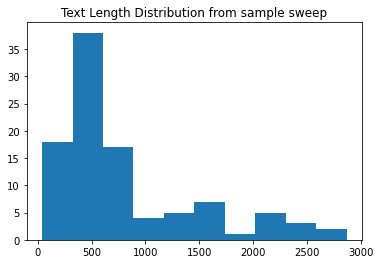

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(text_length)
plt.title('Text Length Distribution from sample sweep')
plt.show()


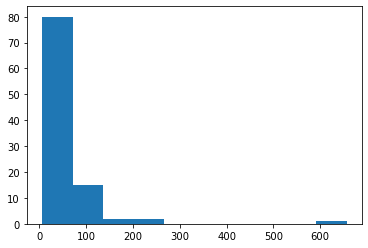

In [139]:
plt.hist(summary_length)
plt.show()

NameError: name 'average' is not defined

In [141]:
sum(text_length)/len(text_length)

797.77

In [142]:
sum(summary_length)/len(summary_length)

53.2